In [12]:
# making dataframes to store all inputs
il1b_resistance_list = []
# il6_resistance_list = []
# tnfa_resistance_list = []
# crp_resistance_list = []
# lactoferrin_resistance_list = [] 

## Here, enter your potentiostat data formatted as three columns in an excel file: Time, Potential, current

In [17]:
# This is where you would input the electrical properties measured by your sensor. 
# A future direction would be to modify the code to accept continuous input.

import pandas as pd
list_of_vals1 = pd.read_excel("IL-1b_mock_potentiostat_data.xlsx") # file containing electrical measurements made by 
# your device when exposed to solution (sweat, blood, etc.) containing biomarker. Here we use an example data set taken 
# for the first 99 time points on 125nM IL-1beta solution, then for the next 99 time points on 250nM IL-beta solution, to
# show proof of concept: that the Resistance measured changes with changing concentration.  
list_of_vals1.columns = ["Time", "V", "I"]

#converting to resistance using Ohm's law
for i in range(len(list_of_vals1["V"].values)):
    il1b_resistance = (list_of_vals1["V"].values[i])/(list_of_vals1["I"].values[i]) # Ohm's Law says that Resistance is 
    # the dividend of Voltage and Current, which are measured by our potentiostat
    il1b_resistance_list.append(il1b_resistance)
    
# use the same code as above for all your biomarkers of interest

In [18]:
# making dataframes to store all outputs
il1b_sweat_list = []
# il6_sweat_list = []
# tnfa_sweat_list = []
# crp_sweat_list = []
# lactoferrin_sweat_list = []

Due to experimental errors, the data we have for Concentration of biomarker and the Resistance measured by our sensor does not fit very well to any equation. For now, we use the best-fitting exponential equation we can achieve since that is the kind of equation we expect according to Cai, H.; Lee T.M.; Hsing, I. Label-free protein recognition using an aptamer-based impedance measurement assay. Sensors and Actuators B: Chemical. 2006, 114, 433-437. DOI: 10.1016/j.snb.2005.06.017

In [19]:
# this part generates the sweat value for each biomarker given the resistance

from numpy import exp

il1b_sweat_list = [84.06 + 1.59*exp(0.005*i + 0.45) for i in il1b_resistance_list] # outputs a Sweat Concentration value for
# every Resistance value in il1b_resistance_list

In [20]:
# making dataframes to store all outputs
il1b_plasma_list = []
# il6_plasma_list = []
# tnfa_plasma_list = []
# crp_plasma_list = []
# lactoferrin_plasma_list = []

In [22]:
# this part converts the sweat concentration to plasma concentration 

# here we can change the equations to fit for any disease/biomarker we need as long as we have equations that convert 
# sweat concentration to blood concentration
    
# for all our biomarker, the equations are linear, so they take this form:
# plasma concentration = a + b * (sweat concentration)
# more equations can be added for more biomarkers or change the existing ones
il1b_plasma_list = [-0.859121099839232 + 0.9114676655388801*i for i in il1b_sweat_list] # outputs a Plasma Concentration for every Sweat Concentration in il1b_sweat_list 
# il6_plasma_list = [-0.36 + 0.79*i for i in il6_sweat_list]
# tnfa_plasma_list = [-0.3610625115091586 + 0.7903607861416451*i for i in tnfa_sweat_list]
# crp_plasma_list = [1*i for i in crp_sweat_list]
# lactoferrin_plasma_list = [1*i for i in lactoferrin_plasma_list]

In [23]:
# making dataframes to store Serum outputs
# crp_serum_list = []
# lactoferrin_serum_list = []

In [24]:
# this section optional depending on if cutoffs for your disease are reported in plasma or serum

# this part converts the plasma concentration to serum concentration for CRP and Lactoferrin, the two biomarkers for which 
# the diagnostic cutoffs for sepsis are reported in the literature in Sepsis



# multiplies each plasma value of CRP by 1, the ratio of CRP between serum and plasma according to 
# Aziz, N., et al. Analytical Performance of a Highly Sensitive C-Reactive Protein-Based Immunoassay and the Effects 
# of Laboratory Variables on Levels of Protein in Blood. Clinical and Diagnostic Laboratory Immunology. 2003, 83 (9), 
# 652-657. DOI: 10.1128/cdli.10.4.652-657.2003

# crp_serum_list = [i*1 for i in crp_plasma_list]  
    
    
    
# multiplies each plasma value of Lactoferrin by 1.41, the ratio of Lactoferrin from plasma to serum 
# according to the ratio of the means of data in the control patients in Barthe, C.; Galabert, C.; 
# Guy-Crotte, O.; Figarella, C. Plasma and serum lactoferrin levels in cystic fibrosis. Relationship with the presence 
# of cystic fibrosis protein. Clinica Chimica Acta. 1989, 181, 183-188. DOI: 10.1016/0009-8981(89)90186-1     

# lactoferrin_serum_list = [1.41*i for i in lactoferrin_plasma_list]

Text(0.5, 0, 'Time (s)')

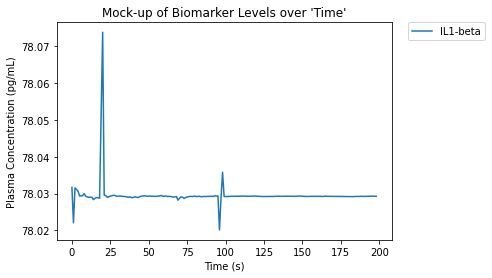

In [28]:
#PLOTTING ALL VARIABLES
plot1 = plt.plot(il1b_plasma_list, label='IL1-beta')
# plot2 = plt.plot(il6_plasma_list, label='IL6')
# plot3 = plt.plot(tnfa_plasma_list, label='TNf-alpha')
# plot4 = plt.plot(crp_serum_list,label='CRP')
# plot5 = plt.plot(lactoferrin_serum_list,label='Lactoferrin')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Mock-up of Biomarker Levels over \'Time\'')
plt.ylabel('Plasma Concentration (pg/mL)')
plt.xlabel('Time (s)')
# plt.xticks([]) # Source: Evans, N. Hide tick label values but keep axis labels. https://stackoverflow.com/questions/37039685/hide-tick-label-values-but-keep-axis-labels (accessed 2021-10-08).
# plt.yticks([])

In [29]:
# Add disease name here
disease_name = "Sepsis" # for our project

In [30]:
# a "Sepsis Risk exists" output means that there is a value above the threshold reported in the literature (see wiki 
# writeup for sources) 
for val in il1b_plasma_list:
    if val >= 0.000157: # diagnostic cutoff for IL1-beta converted to nM. See wiki for explanation and details. Input your 
        # biomarker's accepted cutoff for your disease of choice
        print(f" {disease_name} risk exists according to IL-1beta")
# for val in il_6_list:
#     if val >= 0.00076:
#         print(f"{disease_name} risk exists according to IL-6")
# for val in tnf_a_list:
#     if val >= 0.00029:
#         print(f"{disease_name} risk exists according to TNF-alpha")
# for val in crp_list:
#     if val >= .67:
#         print(f"{disease_name} risk exists according to CRP")
# for val in lactoferrin_list:
#     if val >= 8.44:
#         print(f"{disease_name} risk exists according to Lactoferrin")

 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to IL-1beta
 Sepsis risk exists according to I